Student: Duncan Ferguson <br>
Student Id: 871641260 <br>
Class: Comp 4431-1 <br>
Assignment: Excercise 2 <br>
Date: 9/24/2021 <br>
Group: Name: Broken Toe <br>
Group Members: Emma Bright, Mike Santoro <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Takes inDate year.date.month
def getMonth(inDate):
    return(int(inDate[5:7]))

def getLocationIndex(inLoc):
    count = 0
    while (locations[count] != inLoc) and (count < len(locations)-1):
        count += 1
    return(count)

def getCatIndex(inCat):
    count = 0
    while (itemCategories[count] != inCat) and (count < len(itemCategories)-1):
        count += 1
    return(count)


In [3]:
columns = ["transactionId","number items purchased", "total price of those items", "date", "store","category"]


locations = ['SouthGlenn','Tamarac','HighlandsRanch','ColoradoBlvd','WashingtonPark','CherryCreek','GovernorsRanch',
             'UnionStation','CastleRock']
numLocations = len(locations)
numLocations

9

In [4]:
itemCategories = ['produce','meat','bakery','freezer','dairy','deli','snack','softdrinks','beer','household']
numItemCategories = len(itemCategories)
numItemCategories


10

In [5]:
df = pd.read_csv('ds_ex3_csv.csv', names = columns)
df.head()


,transactionId,number items purchased,total price of those items,date,store,category
0,0,1,2.35,2019.12.13,CherryCreek,household
1,1,10,59.24,2019.02.13,SouthGlenn,snack
2,1,7,10.02,2019.02.13,SouthGlenn,deli
3,1,10,32.00,2019.02.13,SouthGlenn,bakery
4,1,1,2.77,2019.02.13,SouthGlenn,meat


In [6]:
df['month']=df.apply(lambda row: getMonth(row['date']),axis=1)
df['locationIndex']=df.apply(lambda row: getLocationIndex(row['store']),axis=1)
df['catIndex']=df.apply(lambda row: getCatIndex(row['category']),axis=1)

df.head()


,transactionId,number items purchased,total price of those items,date,store,category,month,locationIndex,catIndex
0,0,1,2.35,2019.12.13,CherryCreek,household,12,5,9
1,1,10,59.24,2019.02.13,SouthGlenn,snack,2,0,6
2,1,7,10.02,2019.02.13,SouthGlenn,deli,2,0,5
3,1,10,32.00,2019.02.13,SouthGlenn,bakery,2,0,2
4,1,1,2.77,2019.02.13,SouthGlenn,meat,2,0,1


In [7]:
# Creating a 3d numpy array
# where numLocations and numItemCategories are integers
cube_item = np.zeros((12,numLocations,numItemCategories))
cube_price = np.zeros((12,numLocations,numItemCategories))

#Fills the
for index,row in df.iterrows():
    cube_item[row[6]-1, row[7], row[8]] += row[1]
    cube_price[row[6]-1, row[7], row[8]] += row[2]


In [8]:
print(f'Cube Price: {cube_price.shape}; Cube Item: {cube_item.shape}')
print()
print(cube_price)
print()
print(cube_item)

Cube Price: (12, 9, 10); Cube Item: (12, 9, 10)

[[[ 224.96  585.96  495.96 ...  652.36  886.42  240.44]
  [ 285.47  674.84  646.25 ...  351.29 1268.28  170.74]
  [ 436.66 1905.17 1851.68 ... 1840.54 2846.96  387.62]
  ...
  [ 297.1   778.04  743.72 ...  475.56  971.74  169.96]
  [ 177.76  570.01  296.8  ...  425.43  766.56  303.05]
  [ 280.84  516.8   603.89 ...  338.1   908.86  162.52]]

 [[ 175.27  460.02  740.35 ...  758.76 1181.    153.08]
  [ 217.75  511.21  579.5  ...  407.02  910.17   72.3 ]
  [ 762.95 1635.89 1240.93 ...  677.97 2447.04  338.43]
  ...
  [ 208.59  365.95  671.18 ...  439.63  873.73  111.02]
  [ 200.4   523.3   531.04 ...  295.52  586.85  286.3 ]
  [ 189.99  411.69  647.   ...  319.65  739.59   83.93]]

 [[ 329.03  514.71  744.42 ...  644.93 1044.66  210.14]
  [ 331.58  730.85  560.04 ...  668.28 1030.52  164.27]
  [ 781.58 1558.39  933.81 ...  999.34 1671.77  258.03]
  ...
  [ 264.84  583.91  361.59 ...  634.12  723.77  132.16]
  [ 300.19  901.96  354.25 ...  3

In [9]:
# Converting the numpy array back to a panda for easier manipulation with graphs and display

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_cat_price = np.sum(cube_price, axis=1)
month_cat_item = np.sum(cube_item, axis=1)
month_cat_price_df = pd.DataFrame(month_cat_price, columns=itemCategories, index=months)
month_cat_item_df = pd.DataFrame(month_cat_item, columns=itemCategories, index=months)

print(f'Month vs Category Price shape: {month_cat_price.shape}')
print(month_cat_price_df)

Month vs Category Price shape: (12, 10)
     produce      meat   bakery  freezer    dairy     deli    snack  \
Jan  2427.71   6685.19  6365.32  5248.78  5108.17  5585.77  6134.24   
Feb  2611.05   5903.53  6339.34  5480.93  5829.65  5489.14  4857.21   
Mar  3156.55   6273.97  4853.84  5910.44  5931.07  5375.88  5413.22   
Apr  3064.88   5827.24  5817.29  5274.84  5359.24  5336.51  5207.28   
May  2789.21   6685.65  6367.08  5375.57  5964.09  6177.90  6090.44   
Jun  2523.08   4571.63  5086.31  5460.43  5670.28  5384.04  6226.47   
Jul  2931.31  29622.65  5596.71  5920.86  6154.90  5904.03  5885.48   
Aug  2439.52  23994.03  4961.62  4822.72  5242.23  5504.37  5085.03   
Sep  2403.31  26471.24  5440.81  5217.59  5396.54  5042.67  5969.96   
Oct  2670.67   6811.22  5669.77  5304.16  5779.67  4695.01  5612.65   
Nov  2761.85   6750.79  6299.51  5943.55  6136.46  5969.95  4839.52   
Dec  2444.55   6698.25  5112.82  5962.51  5149.38  5019.84  5856.47   

     softdrinks      beer  household

In [10]:
print(f'Month vs Category Item shape: {month_cat_item.shape}')
print(month_cat_item_df)


Month vs Category Item shape: (12, 10)
     produce    meat  bakery  freezer   dairy    deli   snack  softdrinks  \
Jan    960.0   559.0  1134.0    942.0  1009.0  1015.0  1152.0      1034.0   
Feb    941.0   498.0  1067.0    985.0  1082.0   963.0   879.0       921.0   
Mar   1079.0   561.0   910.0   1119.0  1044.0  1009.0   928.0      1074.0   
Apr   1085.0   564.0  1041.0    958.0   950.0   997.0   899.0       997.0   
May    981.0   590.0  1074.0   1041.0  1118.0  1105.0  1159.0      1074.0   
Jun   1021.0   464.0   961.0   1076.0  1042.0   981.0   994.0       929.0   
Jul   1013.0  2828.0  1140.0   1097.0  1075.0  1115.0  1134.0      1142.0   
Aug    809.0  2201.0   960.0    866.0   884.0  1013.0   847.0       962.0   
Sep    916.0  2560.0   991.0    920.0   921.0   990.0  1045.0       974.0   
Oct   1036.0   632.0  1067.0   1063.0  1051.0   971.0  1015.0      1230.0   
Nov   1002.0   563.0  1138.0   1065.0  1057.0  1032.0   908.0       879.0   
Dec    969.0   607.0   952.0   1054.0

In [11]:
month_loc_price = np.sum(cube_price, axis=2)
month_loc_item = np.sum(cube_item, axis=2)
month_loc_price_df = pd.DataFrame(month_loc_price, columns=locations, index=months)
month_loc_item_df = pd.DataFrame(month_loc_item, columns=locations, index=months)

print(f'Month vs Location Price shape: {month_loc_price.shape}')
print(month_loc_price_df)

Month vs Location Price shape: (12, 9)
     SouthGlenn  Tamarac  HighlandsRanch  ColoradoBlvd  WashingtonPark  \
Jan     5776.80  5581.44        14933.71       5738.21         5969.57   
Feb     5755.00  4249.45        12120.91       5246.07         6663.01   
Mar     5990.70  5879.52        11234.86       5475.63         5967.95   
Apr     5552.05  5153.75        13648.87       4603.69         6397.47   
May     5604.08  4877.53        14937.02       5562.12         6613.21   
Jun     7431.50  5186.66        11734.85       5604.53         7305.38   
Jul     9298.15  9185.90        26373.94       9158.76         8929.46   
Aug     7380.76  8610.33        16984.15       7604.70         9716.56   
Sep     6459.03  9906.88        24737.04       7114.66         9759.32   
Oct     5439.17  5151.04        16262.58       4659.51         5066.97   
Nov     5723.03  5435.64        12744.17       5233.90         4671.17   
Dec     5294.67  5240.46        13354.34       5590.29         6102.70   

In [12]:
print(f'Month vs Category Item shape: {month_loc_item.shape}')
print(month_loc_item_df)

Month vs Category Item shape: (12, 9)
     SouthGlenn  Tamarac  HighlandsRanch  ColoradoBlvd  WashingtonPark  \
Jan      1623.0   1049.0          2230.0        1095.0           692.0   
Feb      1503.0    778.0          1900.0        1024.0           811.0   
Mar      1579.0   1096.0          1824.0        1075.0           740.0   
Apr      1479.0   1045.0          1978.0         875.0           797.0   
May      1457.0    967.0          2256.0        1029.0           817.0   
Jun      1830.0    946.0          1928.0        1036.0           825.0   
Jul      2188.0   1432.0          3334.0        1380.0          1035.0   
Aug      1684.0   1415.0          2310.0        1234.0          1023.0   
Sep      1583.0   1538.0          3236.0        1218.0          1051.0   
Oct      1443.0   1022.0          2544.0         943.0           655.0   
Nov      1495.0   1001.0          1794.0        1000.0           573.0   
Dec      1410.0    940.0          2146.0        1066.0           744.0   


In [13]:
cat_loc_price = np.sum(cube_price, axis=0)
cat_loc_item = np.sum(cube_item, axis=0)
cat_loc_price_df = pd.DataFrame(cat_loc_price, columns=itemCategories, index=locations)
cat_loc_item_df = pd.DataFrame(cat_loc_item, columns=itemCategories, index=locations)

In [14]:
print(f'Category vs Location Item shape: {cat_loc_item.shape}')
print(cat_loc_item_df)

Category vs Location Item shape: (9, 10)
                produce    meat  bakery  freezer   dairy    deli   snack  \
SouthGlenn       1711.0  1799.0  1961.0   1822.0  1848.0  1921.0  1820.0   
Tamarac          1261.0  1402.0  1323.0   1256.0  1353.0  1338.0  1409.0   
HighlandsRanch   2566.0  2952.0  2898.0   2686.0  2662.0  2400.0  2564.0   
ColoradoBlvd     1284.0  1081.0  1143.0   1367.0  1341.0  1273.0  1348.0   
WashingtonPark    966.0   905.0   945.0    988.0   908.0  1010.0   978.0   
CherryCreek       585.0   630.0   581.0    561.0   550.0   603.0   584.0   
GovernorsRanch   1314.0  1317.0  1388.0   1216.0  1383.0  1352.0  1265.0   
UnionStation      330.0   389.0   320.0    336.0   289.0   310.0   326.0   
CastleRock       1795.0  2152.0  1876.0   1954.0  1896.0  1935.0  1753.0   

                softdrinks    beer  household  
SouthGlenn          1939.0  3719.0      734.0  
Tamarac             1276.0  2176.0      435.0  
HighlandsRanch      2694.0  5090.0      968.0  
Colora

In [15]:
print(f'Category vs Location Price shape: {cat_loc_price.shape}')
print(cat_loc_price_df)

Category vs Location Price shape: (9, 10)
                produce      meat    bakery   freezer     dairy      deli  \
SouthGlenn      2865.02  11511.88   7083.57   6304.94   6603.60   6712.94   
Tamarac         3132.80  13775.73   6344.17   6035.57   6937.45   6367.28   
HighlandsRanch  7368.59  34198.57  17451.95  16228.30  16542.50  14537.62   
ColoradoBlvd    3149.09  10038.30   5691.46   6748.50   7037.10   5926.18   
WashingtonPark  3770.56  11782.45   7125.03   7346.87   6696.91   8073.17   
CherryCreek     3103.68  12976.81   5990.22   5450.40   5295.93   5757.70   
GovernorsRanch  3208.81  13110.93   6603.26   5921.36   7480.90   6776.51   
UnionStation    2538.14  12721.43   4747.04   5294.64   4475.78   4733.49   
CastleRock      3087.00  16179.29   6873.72   6591.80   6651.51   6600.22   

                   snack  softdrinks      beer  household  
SouthGlenn       6654.29     6544.57  19408.67    2015.46  
Tamarac          6917.01     6699.26  16542.56    1706.77  
Highlan

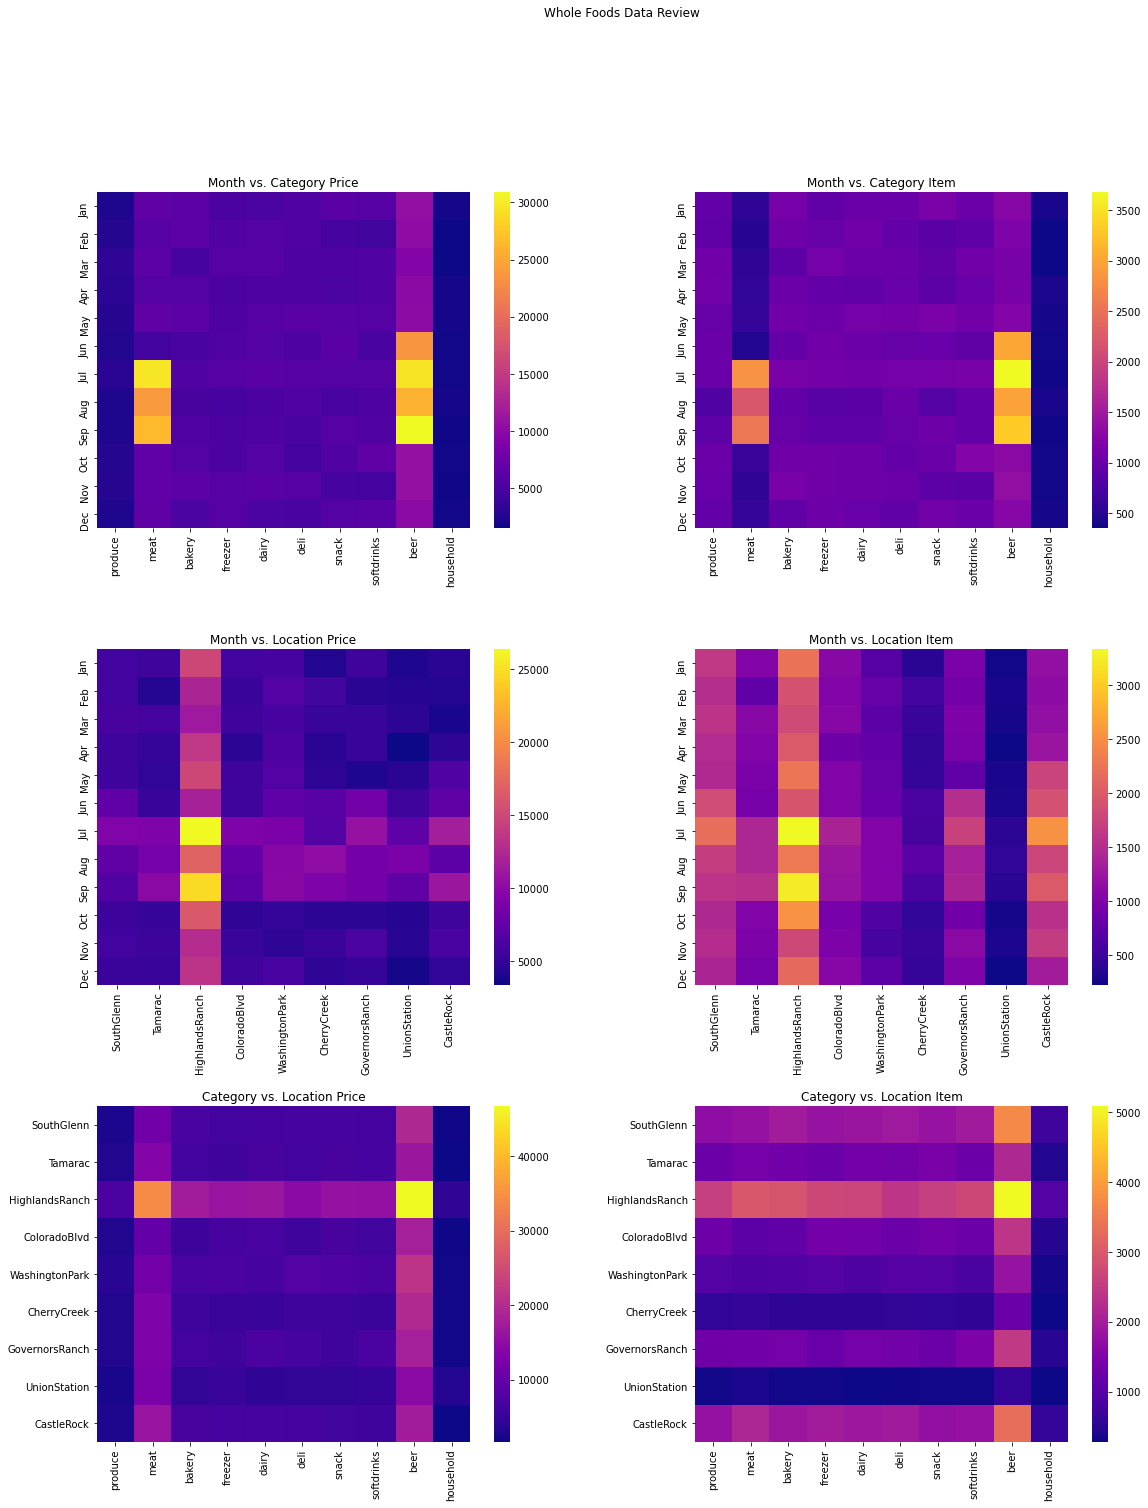

In [16]:
# We decided to look at heat maps to help analyze the data. By doing this we were able to visually find insights
# quickly
fig, axes = plt.subplots(3, 2, figsize=(18, 22))

fig.suptitle('Whole Foods Data Review')
fig.tight_layout(pad=10.0)

sns.heatmap(month_cat_price_df,ax=axes[0, 0],cmap='plasma')
sns.heatmap(month_cat_item_df,ax=axes[0, 1],cmap='plasma')
sns.heatmap(month_loc_price_df, ax=axes[1, 0],cmap='plasma')
sns.heatmap(month_loc_item_df, ax=axes[1, 1],cmap='plasma')
sns.heatmap(cat_loc_price_df, ax=axes[2, 0],cmap='plasma')
sns.heatmap(cat_loc_item_df, ax=axes[2, 1],cmap='plasma')
axes[0, 0].title.set_text('Month vs. Category Price')
axes[0, 1].title.set_text('Month vs. Category Item')
axes[1, 0].title.set_text('Month vs. Location Price')
axes[1, 1].title.set_text('Month vs. Location Item')
axes[2, 0].title.set_text('Category vs. Location Price')
axes[2, 1].title.set_text('Category vs. Location Item')

Interesting insights from the data
- Month versus Category: We found that Meat and Beer have strong coorelations during the summer months\
- Month Versus Locaiton: We found that highlands ranch is the largest revenue generator throughout the year
- and the stores are busier based on sales and products sold in the summer months
- Category versus Location: We found that highlands ranch sells the most beer at a higher price. It is intersting to
- see that Castle Rock and Southglenn sell beer at a lower price per item

